In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('../Data/socr.csv',sep=',')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [8]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [13]:
##2) Pra Proses Data

In [14]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(
        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,    # in -> cm
        berat_kg=lambda d: d["berat_kg"] * 0.45359237  # Lb -> kg
    )
    .round({"tinggi_cm": 2, "berat_kg": 2})
).copy()

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [16]:
## 5) Pembagian Data, 80% Data training 20% Data testing

In [26]:
from sklearn.model_selection import train_test_split

## Variable independetnt/bebas/fitur : Tinggi badan
X = df1[["tinggi_cm"]]
## Variable Independent/terikat/target : Berat Badam
y = df1[["berat_kg"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

print('jumlah data training ' , len(X_train))
print('jumlah data testing ' , len(X_test))

jumlah data training  20000
jumlah data testing  5000


In [25]:
from sklearn.linear_model import LinearRegression

## buat obkjek instan dari class LinearRegresssion bernama model
model = LinearRegression()

## jalankan Training
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


7) Evaluasi Model

In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien (kg per cm):", model.coef_[0])
print("Intersep (kg):        ", model.intercept_)
print("R2 (test):            ", r2)
print("MAE (kg):             ", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred) # default squared=True
rmse = np.sqrt(mse)
print("RMSE (kg):            ", rmse)

Koefisien (kg per cm): [0.55182326]
Intersep (kg):         [-37.65708878]
R2 (test):             0.24989263013277574
MAE (kg):              3.670410789894354
RMSE (kg):             4.609006140308042


## Persamaan Regresi

In [48]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Persamaan: y = {slope:.3f} * x + {intercept:.3f}")

Persamaan: y = 0.552 * x + -37.657


## Plot Regresi

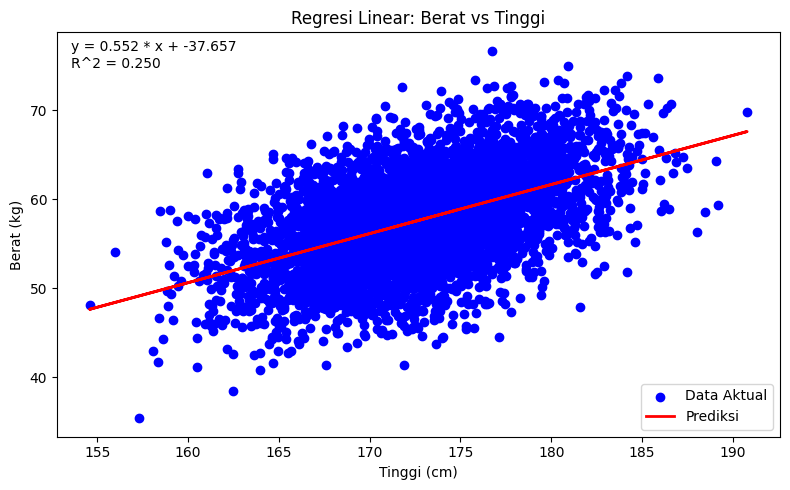

In [49]:
import matplotlib.pyplot as plt

# Plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")
# Garis regresi
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\nR^2 = {r2:.3f}",
    transform=plt.gca().transAxes, va="top"
)
plt.legend()
plt.tight_layout()
plt.show()